In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
X_df=pd.read_csv('/content/linearX.csv')
Y_df=pd.read_csv('/content/linearY.csv')

In [5]:
x=np.array(X_df)
mean=np.mean(x)
std=np.std(x)
x=(x-mean)/std
X_df=pd.DataFrame(x)
X_df.columns=['X']
print(X_df)

           X
0  -0.029801
1   0.606542
2   0.201596
3  -0.666144
4  -0.203349
..       ...
94 -0.145500
95  1.242885
96 -1.128939
97 -0.434747
98 -0.434747

[99 rows x 1 columns]


In [6]:
y=np.array(Y_df)
mean=np.mean(y)
std=np.std(y)
y=(y-mean)/std
Y_df=pd.DataFrame(y)
Y_df.columns=['Y']
print(Y_df)

           Y
0  -3.199825
1   0.514700
2  -1.352312
3  -0.757598
4  -0.162884
..       ...
94 -0.211631
95  0.470827
96 -0.972085
97  0.812057
98  0.032104

[99 rows x 1 columns]


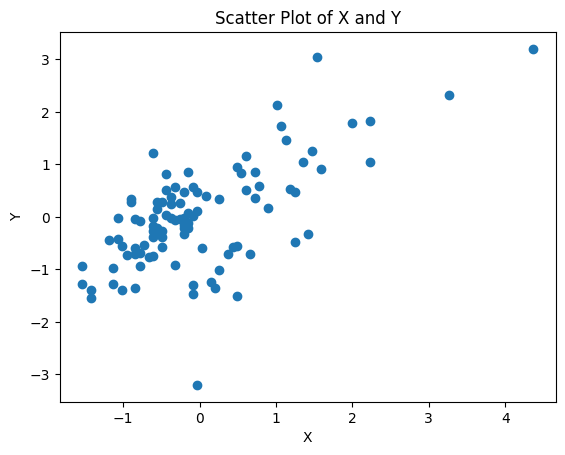

In [7]:
plt.scatter(X_df,Y_df)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y')
plt.show()

In [32]:
class LinearRegression:
    def __init__(self, learning_rate, num_iterations,choice):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta_0 = 0.0
        self.theta_1 = 0.0
        self.cost_history = []
        self.choice=choice
        self.batch_size=10

    def fit(self, X, Y):

      self.X=np.array(X)
      self.Y=np.array(Y)
      if "batch" in self.choice:
        self.theta_0,self.theta_1,self.cost_history=batch_gradient_descent(self.X, self.Y, self.learning_rate, self.num_iterations)
      elif "stochastic" in self.choice:
        self.theta_0,self.theta_1,self.cost_history=stochastic_gradient_descent(self.X, self.Y, self.learning_rate, self.num_iterations)
      elif "mini_batch" in self.choice:
        self.theta_0,self.theta_1,self.cost_history=mini_batch_gradient_descent(self.X, self.Y, self.learning_rate, self.num_iterations,self.batch_size)
      return self.cost_history,self.theta_0,self.theta_1

    def predict(self, X):
        self.X=np.array(X)
        return self.theta_0 + self.theta_1 * self.X

In [31]:
def batch_gradient_descent(X, Y, lr, iterations, convergence_threshold=1e-6):
    m = len(Y)
    theta_0, theta_1 = 0.0, 0.0
    cost_history= []
    prev_cost = float('inf')
    for i in range(iterations):
        h_theta = theta_0 + theta_1 * X

        cost = (1 / (2 * m)) * np.sum((h_theta - Y) ** 2)
        cost_history.append(cost)
        grad_theta_0 = (1 / m) * np.sum(h_theta - Y)
        grad_theta_1 = (1 / m) * np.sum((h_theta - Y) * X)

        theta_0 -= lr * grad_theta_0
        theta_1 -= lr * grad_theta_1

    return cost_history,theta_0, theta_1


Model Parameter:-
Cost Function Value: 0.280907
Theta_0 Value: -0.000000
Theta_1 Value: 0.661955


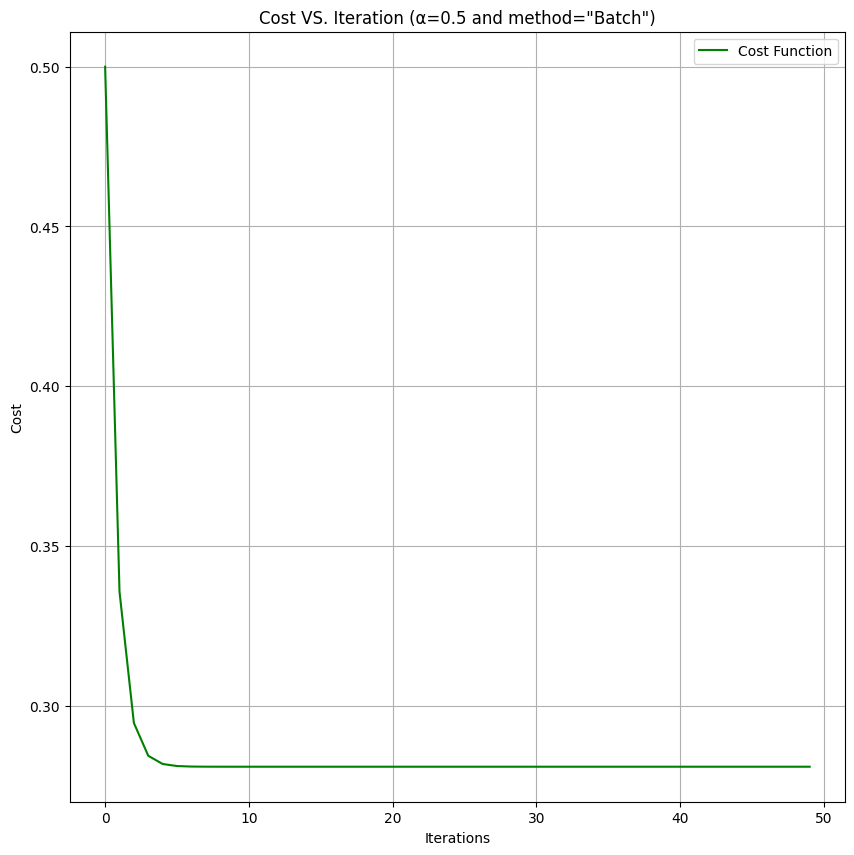

In [80]:
learning_rate = 0.5
theta_0=0
theta_1=0
cost_history=[]

linearr = LinearRegression(learning_rate, num_iterations, choice)


cost_history,theta_0,theta_1 = linearr.fit(X_df, Y_df)


predictions = linearr.predict(X_df)


print(f"Model Parameter:-")
print(f"Cost Function Value: {cost_history[-1]:.6f}")
print(f"Theta_0 Value: {theta_0:.6f}")
print(f"Theta_1 Value: {theta_1:.6f}")


iterations = np.arange(num_iterations)
plt.figure(figsize=(10, 10))
plt.plot(iterations, cost_history, color='green', label='Cost Function')
plt.title('Cost VS. Iteration (α=0.5 and method="Batch")')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()


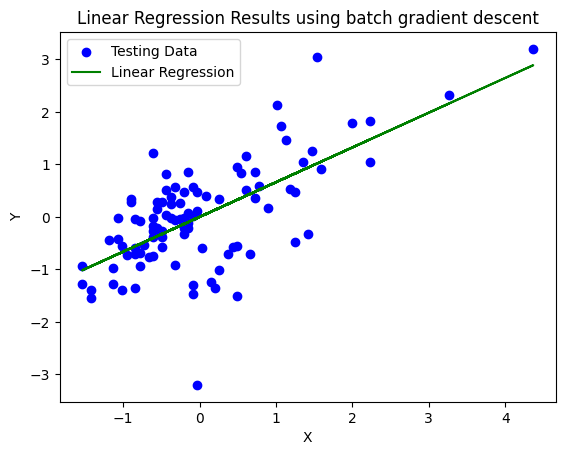

In [12]:

# plt.scatter(x_train, y_train, label='Training Data', color='red')
plt.scatter(X_df, Y_df, label='Testing Data', color='blue')
plt.plot(X_df, predictions, label='Linear Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results using batch gradient descent')
plt.legend()
plt.show()

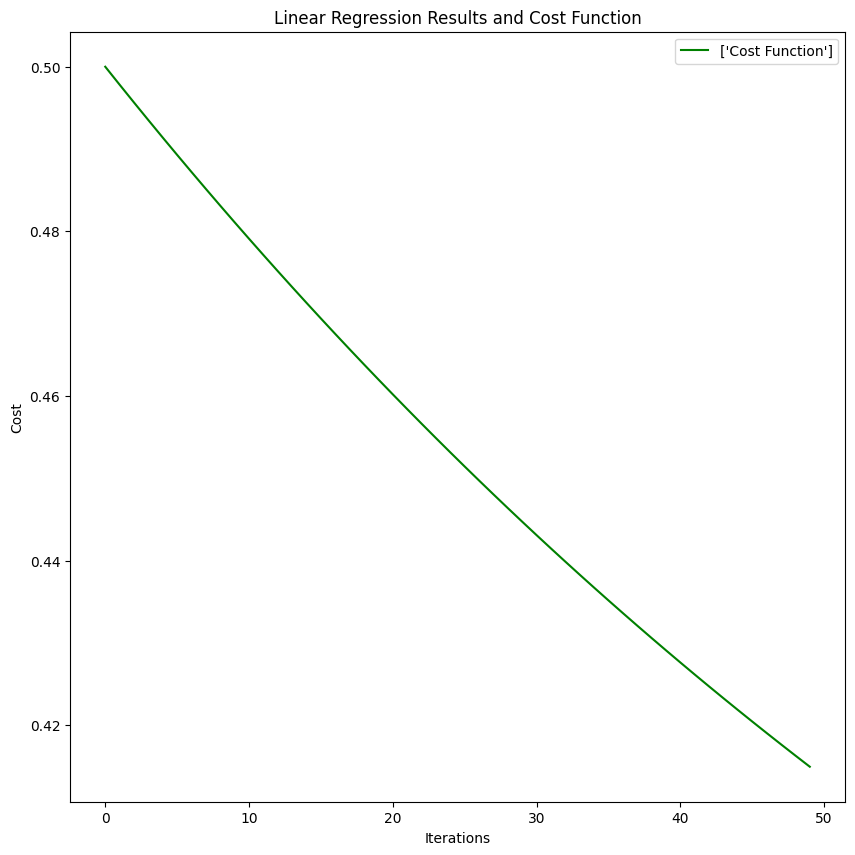

In [13]:
learning_rate = 0.005
num_iterations = 50
choice="batch"
linearr = LinearRegression(learning_rate, num_iterations,choice)
theta_0,theta_1,cost_history = linearr.fit(X_df,Y_df)
predictions = linearr.predict(X_df)
iter=np.array(range(0,50))
plt.figure(figsize=(10, 10))
plt.plot(iter, cost_history, color='green', label=['Cost Function'])
plt.title('Linear Regression Results and Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

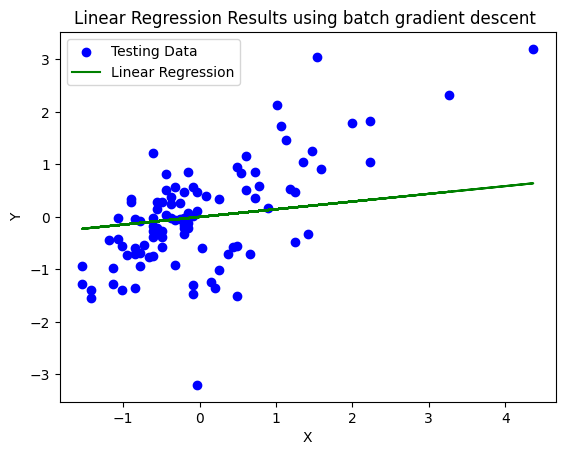

In [14]:
plt.scatter(X_df, Y_df , label='Testing Data', color='blue')
plt.plot(X_df, predictions, label='Linear Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results using batch gradient descent ')
plt.legend()
plt.show()

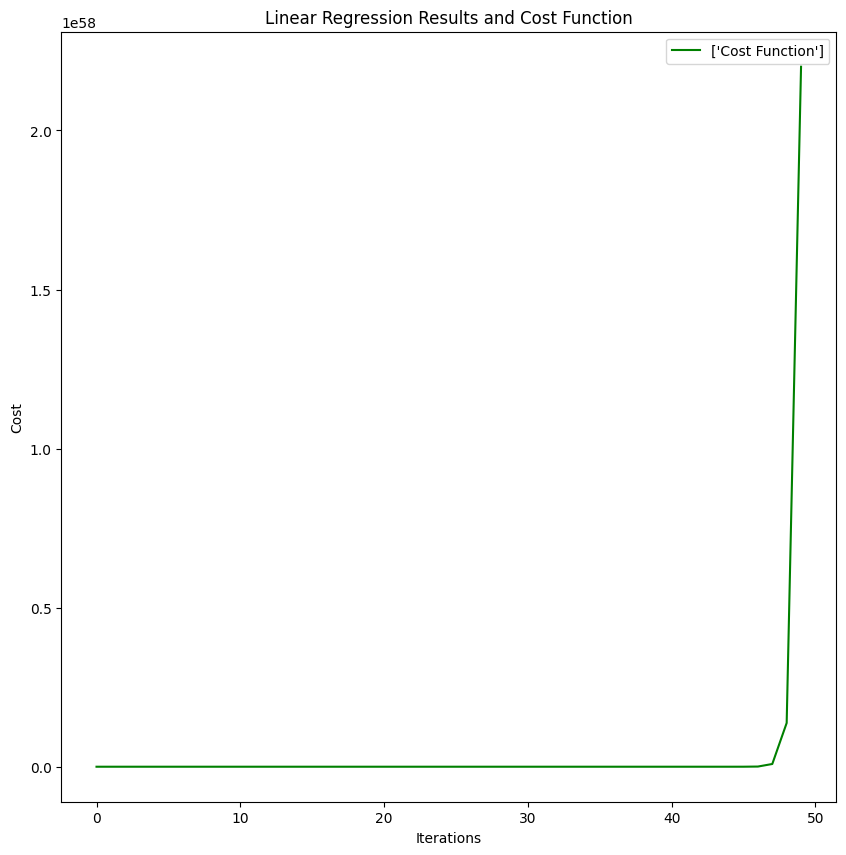

In [15]:
learning_rate = 5
num_iterations = 50
choice="batch"
linearr = LinearRegression(learning_rate, num_iterations,choice)
theta_0,theta_1,cost_history = linearr.fit(X_df,Y_df)
predictions = linearr.predict(X_df)
iter=np.array(range(0,50))
plt.figure(figsize=(10, 10))
plt.plot(iter, cost_history, color='green', label=['Cost Function'])
plt.title('Linear Regression Results and Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

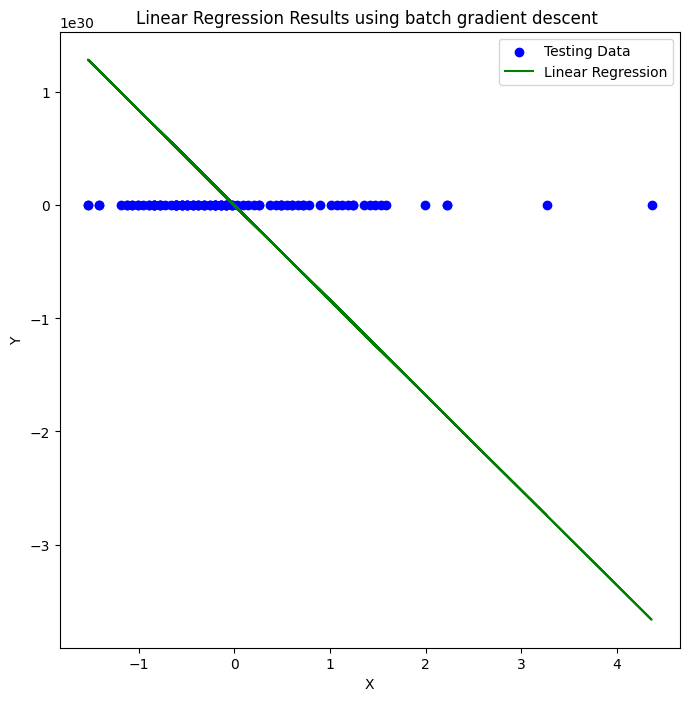

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(X_df,Y_df, label='Testing Data', color='blue')
plt.plot(X_df, linearr.predict(X_df), label='Linear Regression', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Results using batch gradient descent ')
plt.legend()
plt.show()

In [17]:
def stochastic_gradient_descent(X, Y, lr, iterations, convergence_threshold=1e-6):
    m = len(Y)
    theta_0, theta_1 = 0.0, 0.0
    cost_history = []
    prev_cost = float('inf')

    for i in range(iterations):
        # total_cost=0
        for j in range(m):
            idx = np.random.randint(0, m)
            x_i, y_i = X[idx], Y[idx]

            h_theta = theta_0 + theta_1 * x_i

            # cost = (1 / 2) * (h_theta - y_i) ** 2

            grad_theta_0 = (h_theta - y_i)
            grad_theta_1 = (h_theta - y_i) * x_i

            theta_0 -= lr * grad_theta_0
            theta_1 -= lr * grad_theta_1
        h_theta_full = theta_0 + theta_1 * X
        cost = (1 / (2 * m)) * np.sum((h_theta_full - Y) ** 2)
        cost_history.append(cost)
    return theta_0, theta_1, cost_history


In [77]:
def mini_batch_gradient_descent(X, Y, lr, iterations, batch_size, convergence_threshold=1e-6):
    m = len(Y)
    theta_0, theta_1 = 0.0, 0.0
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled, Y_shuffled = X[indices], Y[indices]

        for start in range(0, m, batch_size):
            end = min(start + batch_size, m)
            X_batch, Y_batch = X_shuffled[start:end], Y_shuffled[start:end]

            h_theta = theta_0 + theta_1 * X_batch
            grad_theta_0 = np.mean(h_theta - Y_batch)
            grad_theta_1 = np.mean((h_theta - Y_batch) * X_batch)

            theta_0 -= lr * grad_theta_0
            theta_1 -= lr * grad_theta_1

        h_theta_full = theta_0 + theta_1 * X
        cost = np.mean((h_theta_full - Y) ** 2) / 2
        cost_history.append(cost)

    return theta_0, theta_1, cost_history


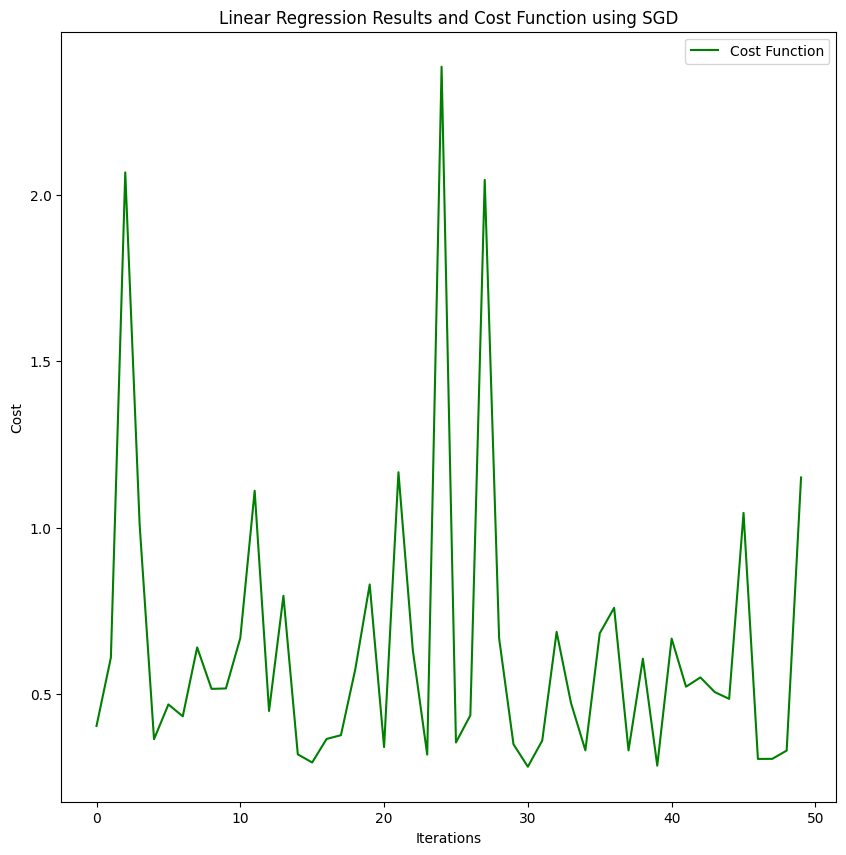

In [75]:
learning_rate = 0.5
num_iterations = 50
choice="stochastic"
linearr = LinearRegression(learning_rate, num_iterations,choice)
theta_0,theta_1,cost_history = linearr.fit(X_df,Y_df)
predictions = linearr.predict(X_df)
iter=np.array(range(0,50))
plt.figure(figsize=(10, 10))
plt.plot(iter, cost_history, color='green', label='Cost Function')
plt.title('Linear Regression Results and Cost Function using SGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

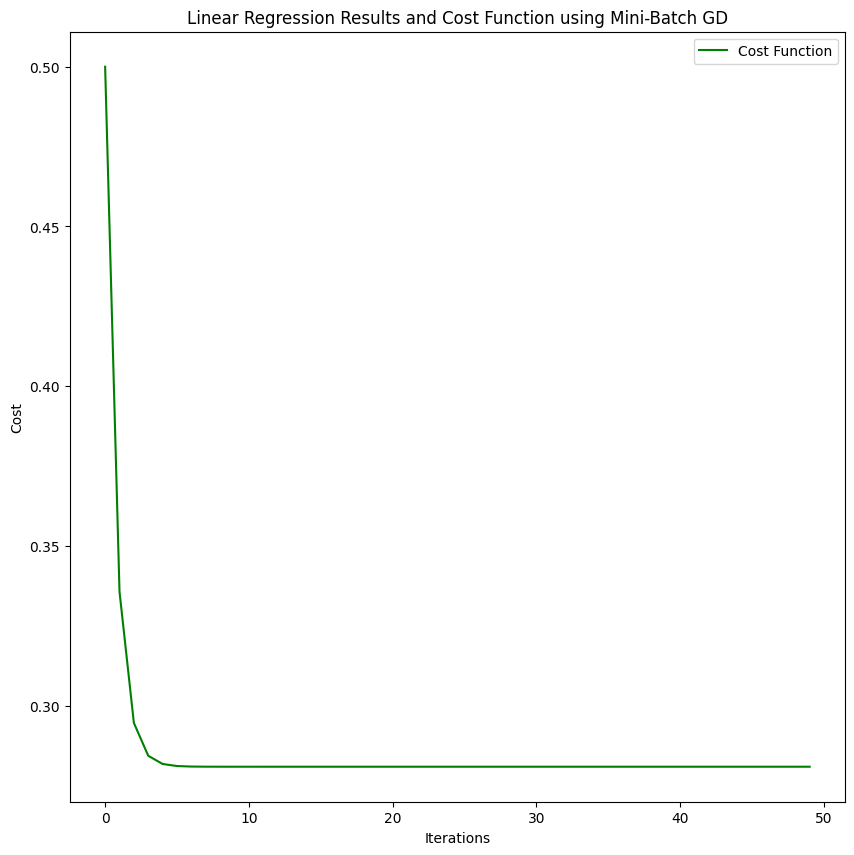

In [78]:
learning_rate = 0.5
num_iterations = 50
choice="mini_batch"
linearr = LinearRegression(learning_rate, num_iterations,choice)
cost_history,theta_0,theta_1= linearr.fit(X_df,Y_df)
predictions = linearr.predict(X_df)
iter=np.array(range(0,50))
print()
plt.figure(figsize=(10, 10))
plt.plot(iter, cost_history, color='green', label='Cost Function')
plt.title('Linear Regression Results and Cost Function using Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()